<a href="https://colab.research.google.com/github/aribaz3/major-pro/blob/main/Personalised%20Drug%20treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title
Machine Learning-Based Patient Classification for Personalized Drug Treatment: A Comprehensive Evaluation and Model Selection Approach

#Abstract

The project revolves around the development and evaluation of a machine learning model for the classification of patients into distinct drug treatment categories based on their individual attributes. The dataset utilized for this endeavor, known as "Drug200," comprises essential features including age, gender, blood pressure levels, cholesterol status, and the sodium-to-potassium ratio in the patients' blood. Through rigorous data preprocessing, model selection, and hyperparameter tuning, a diverse set of classifiers including Logistic Regression, Random Forest, Support Vector Machine (SVM), and Naive Bayes were employed. The models exhibited remarkable predictive accuracy, with the Random Forest model achieving a perfect classification rate. The Support Vector Machine also demonstrated excellent performance, while the Logistic Regression and Naive Bayes models exhibited robust predictive capabilities. This comprehensive evaluation aids in the selection of an optimal classification model, setting the stage for potential deployment in real-world healthcare scenarios. The project serves as an illustrative example of applying machine learning techniques for medical decision support systems, with implications for personalized treatment strategies.

#Methodology

1. Data Acquisition and Exploration
   - The project commenced with the acquisition of the "Drug200" dataset, which encapsulates patient attributes including age, gender, blood pressure levels, cholesterol status, and the sodium-to-potassium ratio. Initial exploration involved loading and scrutinizing the dataset for insights into its structure, dimensions, and data types.

2. Data Preprocessing
   - Data preprocessing played a pivotal role in preparing the dataset for model training. This involved tasks such as handling missing values, encoding categorical variables, and standardizing numerical features to ensure consistency and coherence in the dataset.

3. Feature Engineering
   - Feature engineering was employed to extract additional information and enhance the predictive power of the model. This step included creating new features or transforming existing ones based on domain knowledge and insights gained during data exploration.

4. Data Splitting
   - The dataset was partitioned into training and testing sets to facilitate model training and evaluation. This division allowed for an unbiased assessment of the model's generalization performance.

5. Model Selection and Training
   - A diverse set of classifiers was considered, including Logistic Regression, Random Forest, Support Vector Machine (SVM), and Naive Bayes. Each model was initialized, trained on the training data, and assessed for its predictive capabilities.

6. Hyperparameter Tuning
   - Hyperparameter tuning was conducted to optimize the performance of each model. Techniques like Grid Search and Random Search were employed to search through hyperparameter spaces and identify the best configurations.

7. Model Evaluation
   - The models were evaluated on the testing set using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. This step provided a comprehensive assessment of each model's performance.

8. Confusion Matrix Analysis
   - The confusion matrix was generated to gain a detailed understanding of the model's classification behavior. This facilitated the identification of specific areas where the model excelled and areas where it may require further refinement.

9. Model Comparison and Selection
   - The performance of each model was critically evaluated, considering factors such as accuracy, robustness, and computational efficiency. This process aided in the selection of the most suitable classification model for the given dataset.

10. Result Interpretation and Conclusion
    - Based on the evaluation results, a comprehensive interpretation of the models' performance was conducted. This allowed for informed conclusions regarding the effectiveness of each model in classifying patients into distinct drug treatment categories.

This methodology ensured a systematic approach to building, evaluating, and selecting the most appropriate machine learning model for the classification task at hand. It combined rigorous data preprocessing, feature engineering, model training, and thorough evaluation to achieve optimal results.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder

import plotly.express as px
from plotly import subplots
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="whitegrid")

`MinMaxScaler` scales features to a specified range, typically [0, 1], while `StandardScaler` standardizes features to have a mean of 0 and standard deviation of 1.

In [ ]:
import random
import pandas as pd
import numpy  as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats

#Data cleaning and Preprocessing

In [ ]:
df = pd.read_csv("/content/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [ ]:
df.shape

(200, 6)

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [ ]:
df_cleaned = df.dropna()  # Remove rows with any NaN values


In [ ]:
df_cleaned = df.drop_duplicates()

In [ ]:
df.shape

(200, 6)

In [ ]:
missing_value=['NaN']
df=pd.read_csv("drug200.csv",na_values=missing_value)
df.isnull().any()
df.dropna()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#Hyperparameter tuning



Hyperparameter Tuning

- Hyperparameters are configurations of a machine learning model not learned from data.
- Proper tuning improves model performance, chosen through manual or automated methods.
- Key choices include learning rate, regularization strength, network complexity, tree depth, and kernel type.
- Balances model complexity to avoid overfitting or underfitting.
- Balances computational costs with the extent of hyperparameter search.
- Consider domain-specific factors for critical hyperparameters.
- An iterative process: choose, train, evaluate, adjust.
- Tools like scikit-learn, TensorFlow, Keras aid hyperparameter tuning.
- Validate on a separate set from training data for accurate performance assessment.

This code trains a Random Forest Classifier on a dataset named 'drug200.csv'. It follows these steps:

1. **Import necessary libraries** (pandas, train-test split, Random Forest Classifier, accuracy metric).

2. **Load the dataset** 'drug200.csv' into a variable called `data`.

3. **Select features and target** (Age, Sex, BP, Cholesterol, Na_to_K as features; Drug as target).

4. **Encode categorical variables** (Sex, BP, Cholesterol) using label encoding.

5. **Split data** into training and testing sets (80% for training, 20% for testing).

6. **Initialize and train the Random Forest model**.

7. **Make predictions** on the test set.

8. **Calculate and print accuracy** of the model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('drug200.csv')

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Encode categorical variables if needed
# For example, using label encoding:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['BP'] = label_encoder.fit_transform(X['BP'])
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


#Exploratory Data Analysis


Seaborn provides functions for various visualizations:

1. **Distribution Plots**: Show dataset distributions (e.g., histograms, KDE).

2. **Line Plots**: Display relationships between numerical variables.

3. **Scatter Plots**: Depict relationships between numerical variables.

4. **Heatmaps**: Visualize 2D data with colors representing values.

5. **Correlation Matrices**: Show pairwise variable relationships.

6. **Pair Plots**: Combine scatter plots and histograms for multivariate analysis.

7. **FacetGrid Plots**: Create small plots based on categorical variables.

Features include themes, color palettes, and font customization.

Seaborn simplifies data visualization with style and versatility.



Creates a heatmap using Seaborn, a data visualization library. It's used to visualize missing values in a DataFrame df. Each cell in the heatmap corresponds to a cell in the DataFrame. If the DataFrame cell contains a missing value (NaN), it will be shown in a different color. The y-axis labels (row labels) are turned off with yticklabels=False. This helps you quickly spot where the missing data is.

<Axes: >

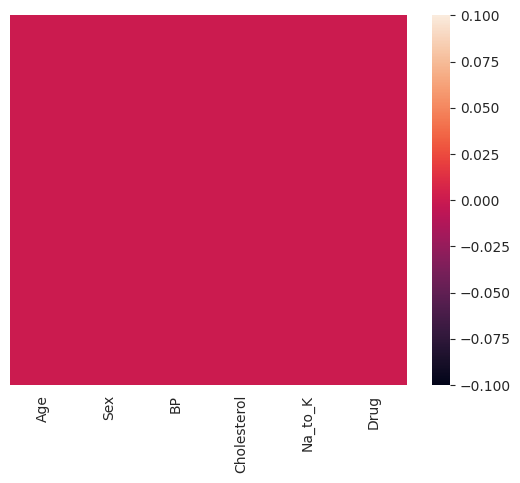

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

In [ ]:
X = df['Age']
Y = df['BP']

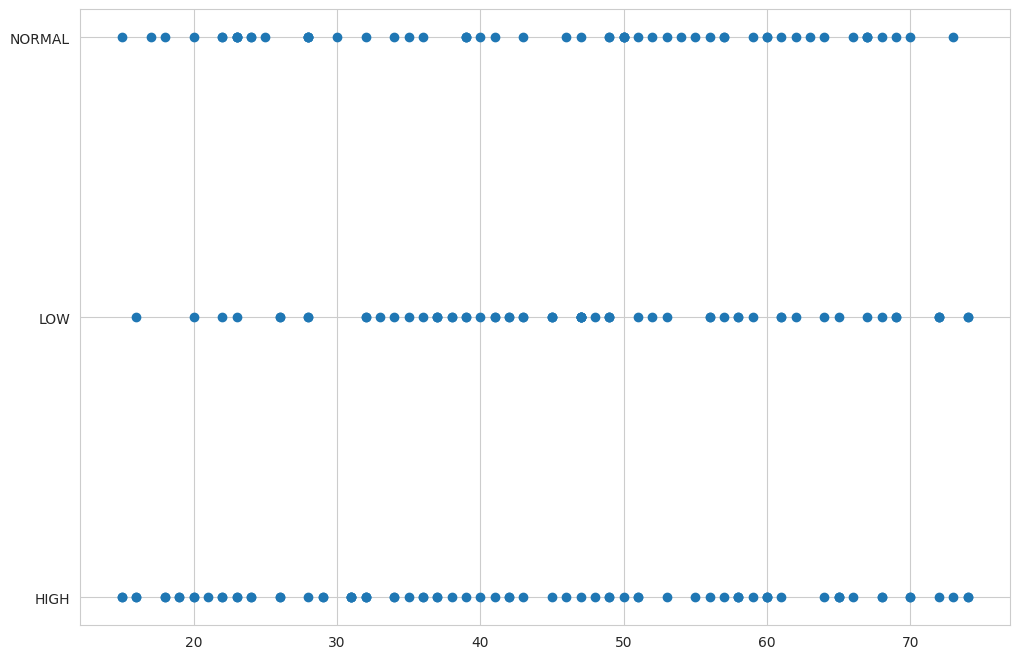

In [ ]:
AgevsBP = df['BP'].value_counts()
plt.figure(figsize=(12, 8))
plt.scatter(X, Y)
plt.show()

In [ ]:
X = df['Age']
Y= df['Drug']

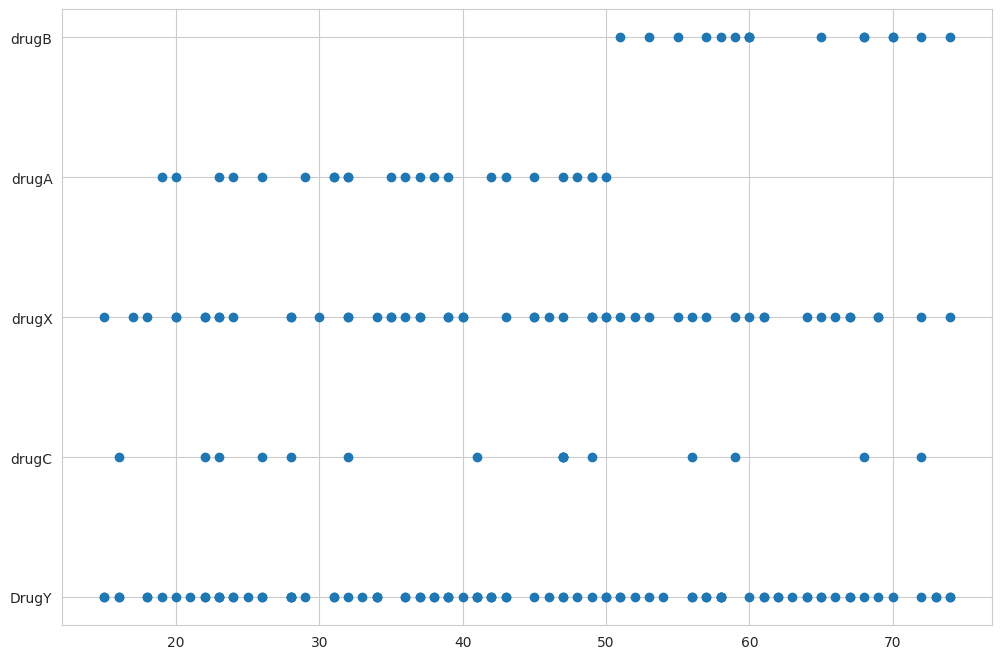

In [ ]:
AgevsDrug = df['Drug'].value_counts()
plt.figure(figsize=(12, 8))
plt.scatter(X, Y)
plt.show()

A box plot summarizes the distribution using key statistics like median and quartiles, while a distribution plot (distplot) provides a detailed view of the data's shape and density using a histogram and kernel density estimate (KDE).

<Axes: xlabel='Drug', ylabel='Na_to_K'>

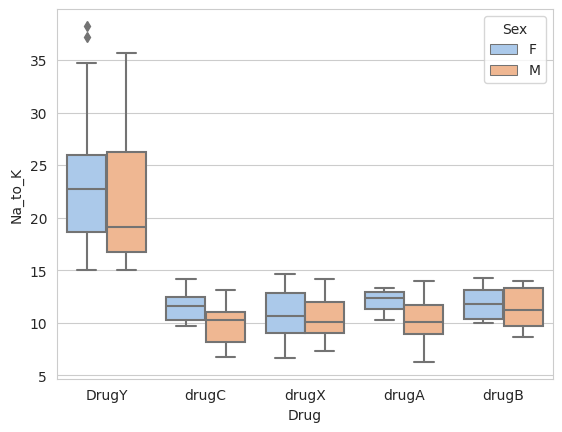

In [ ]:
sns.boxplot(data=df,x="Drug",y="Na_to_K",hue="Sex",palette="pastel")

<Axes: xlabel='Age', ylabel='Density'>

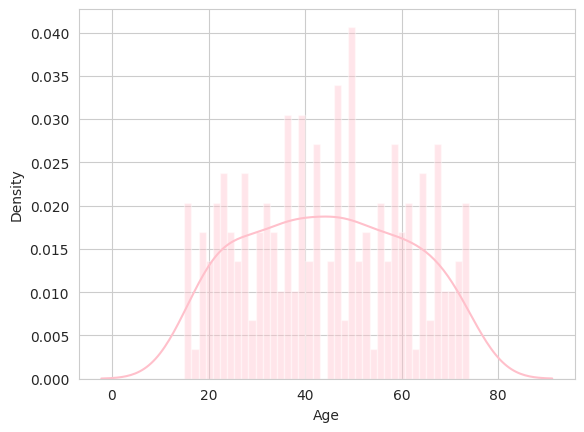

In [ ]:
sns.distplot(df["Age"],bins=40,color="pink")


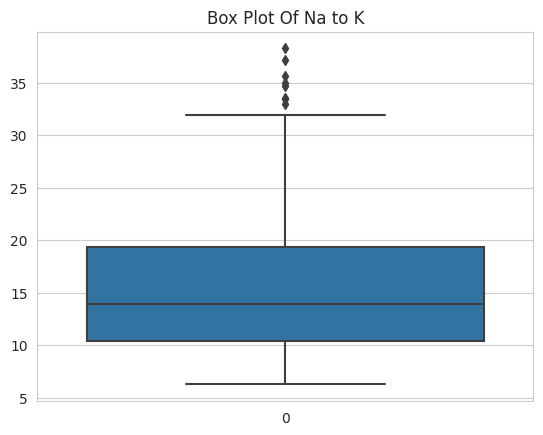

In [ ]:
sns.boxplot(df["Na_to_K"])
plt.title("Box Plot Of Na to K");

Text(0, 0.5, 'Count')

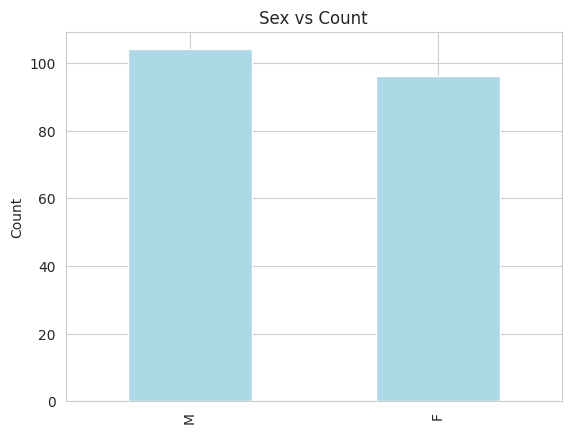

In [ ]:
df["Sex"].value_counts().plot(kind="bar",color="lightblue")
plt.title("Sex vs Count")
plt.ylabel("Count")

<Axes: ylabel='Sex'>

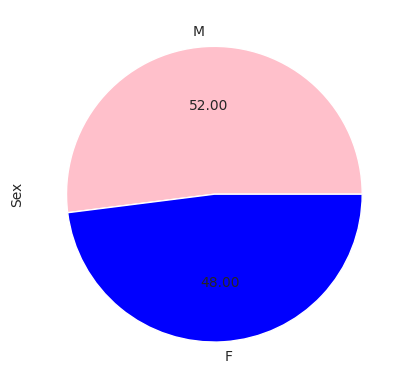

In [ ]:
colors = ["pink","blue"]
df["Sex"].value_counts().plot(kind="pie",autopct="%.2f",colors=colors)

Text(0, 0.5, 'Count')

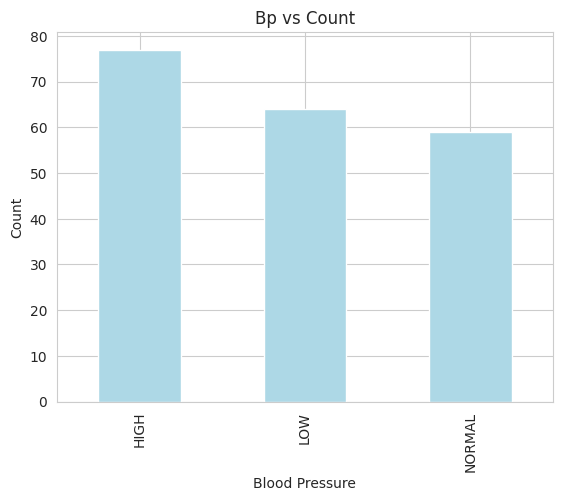

In [ ]:
df["BP"].value_counts().plot(kind="bar",color="lightblue")
plt.title("Bp vs Count")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")

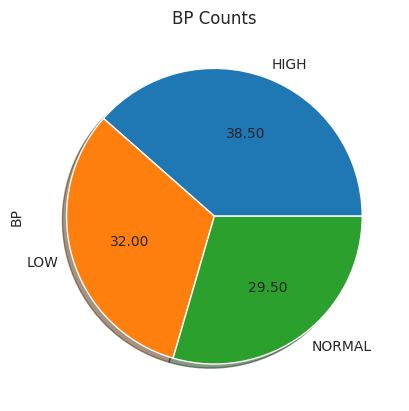

In [ ]:
df["BP"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True)
plt.title("BP Counts");

Text(0, 0.5, 'Count')

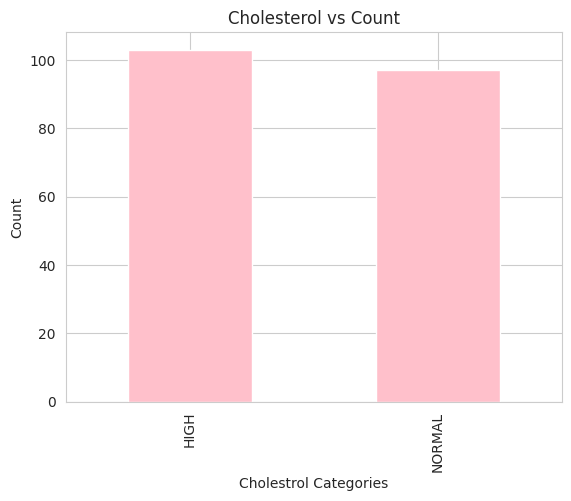

In [ ]:
df["Cholesterol"].value_counts().plot(kind="bar",color="pink")
plt.title("Cholesterol vs Count")
plt.xlabel("Cholestrol Categories")
plt.ylabel("Count")

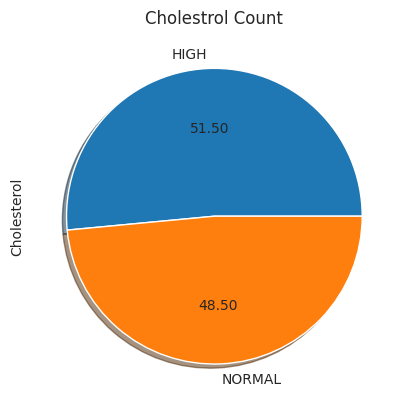

In [ ]:
df["Cholesterol"].value_counts().plot(kind="pie",autopct="%.2f",shadow=True)
plt.title("Cholestrol Count");

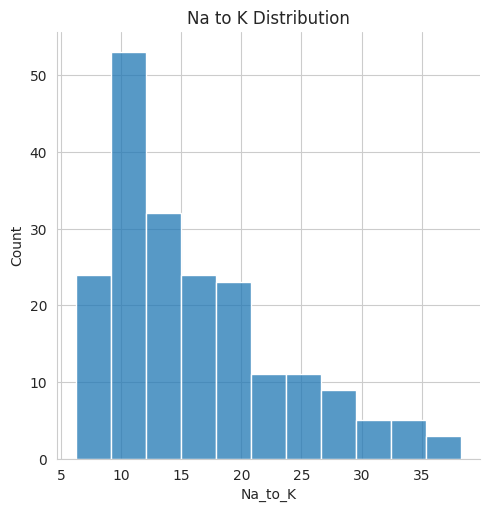

In [ ]:
sns.displot(df["Na_to_K"])
plt.title("Na to K Distribution");

<Axes: >

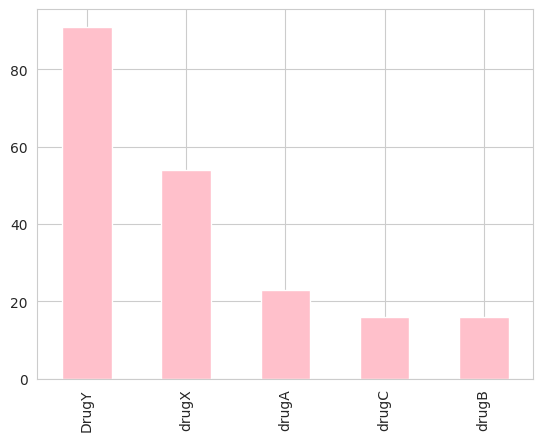

In [ ]:
df["Drug"].value_counts().plot(kind="bar",color="pink")

In [ ]:
total = len(df)
drugs = df["Drug"].value_counts()
drugs = drugs.sort_index(ascending = False)
percentage = [
              str(round(value/total*100, 2)) + "%" \
              for value in drugs.values
]
trace0 = go.Bar(
    x = drugs.values,
    y = drugs.keys(),
    orientation = 'h',
    texttemplate = percentage,
    textposition = "outside",
    textfont_color = "white",
    marker = dict(
        color = drugs.values,
        colorscale = "OrRd"
    )
)
data = [trace0]
fig = go.Figure(data)
fig.update_layout(
    title = "Classified Drugs",
    xaxis_title = "Count",
    yaxis_title = "Drugs",
    template = "plotly_dark",
)
fig.show()

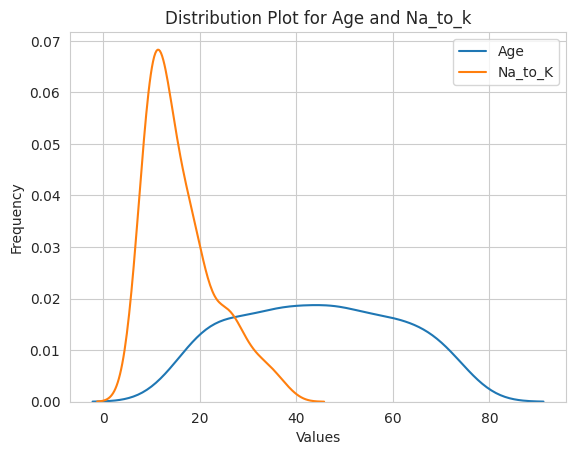

In [ ]:
sns.distplot( x=df['Age'], hist=False, label='Age', bins=10)
sns.distplot( x=df['Na_to_K'],hist=False, label='Na_to_K', bins=10)
plt.title("Distribution Plot for Age and Na_to_k")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
X=df.drop("Drug",axis=1)
y=df["Drug"]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.5,random_state=42)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset (make sure 'drug200.csv' is in the correct path)
data = pd.read_csv('drug200.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'BP' column
data['BP'] = label_encoder.fit_transform(data['BP'])

# Print the updated DataFrame
print(data)


     Age Sex  BP Cholesterol  Na_to_K   Drug
0     23   F   0        HIGH   25.355  DrugY
1     47   M   1        HIGH   13.093  drugC
2     47   M   1        HIGH   10.114  drugC
3     28   F   2        HIGH    7.798  drugX
4     61   F   1        HIGH   18.043  DrugY
..   ...  ..  ..         ...      ...    ...
195   56   F   1        HIGH   11.567  drugC
196   16   M   1        HIGH   12.006  drugC
197   52   M   2        HIGH    9.894  drugX
198   23   M   2      NORMAL   14.020  drugX
199   40   F   1      NORMAL   11.349  drugX

[200 rows x 6 columns]


#Naive Bayes Classifier

This script:

1. Loads a dataset ('drug200.csv') likely containing patient and prescription information.

2. Encodes categorical variables ('Sex', 'BP', 'Cholesterol') into numerical values for machine learning compatibility.

3. Defines features (`X`) as all columns except the target variable ('Drug'), and the target variable is stored in `y`.

4. Splits the data into training and testing sets for model evaluation.

5. Initializes a Gaussian Naive Bayes classifier, suitable for classification tasks.

6. Trains the classifier on the training data to learn patterns.

7. Uses the trained model to predict the prescribed 'Drug' for each patient in the test set.

8. Calculates the accuracy, representing the proportion of correct predictions out of all predictions made.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset (make sure 'drug200.csv' is in the correct path)
data = pd.read_csv('drug200.csv')

# Encode the 'Sex' column
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Encode the 'BP' column
data['BP'] = label_encoder.fit_transform(data['BP'])

# Encode the 'Cholesterol' column
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])

# Assuming the target variable is in the 'Drug' column
X = data.drop('Drug', axis=1)
y = data['Drug']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')




Accuracy: 0.925


#Decision Tree Classifier



1. **Initializing the Decision Tree Classifier**:
   - A Decision Tree Classifier is initialized. This type of model makes decisions based on a series of binary questions.

2. **Model Training**:
   - The classifier is trained on the training data. This means it learns to make decisions based on the provided features.

3. **Prediction**:
   - The trained classifier is used to predict the target variable for the test set. It predicts which drug each patient should be prescribed based on their attributes.

4. **Accuracy Calculation**:
   - The accuracy of the predictions is calculated. Accuracy measures the proportion of correct predictions out of the total predictions made.

5. **Decision Tree Visualization**:
   - The trained decision tree is visualized. This allows for a better understanding of how the model makes decisions based on the features.


Accuracy: 1.00


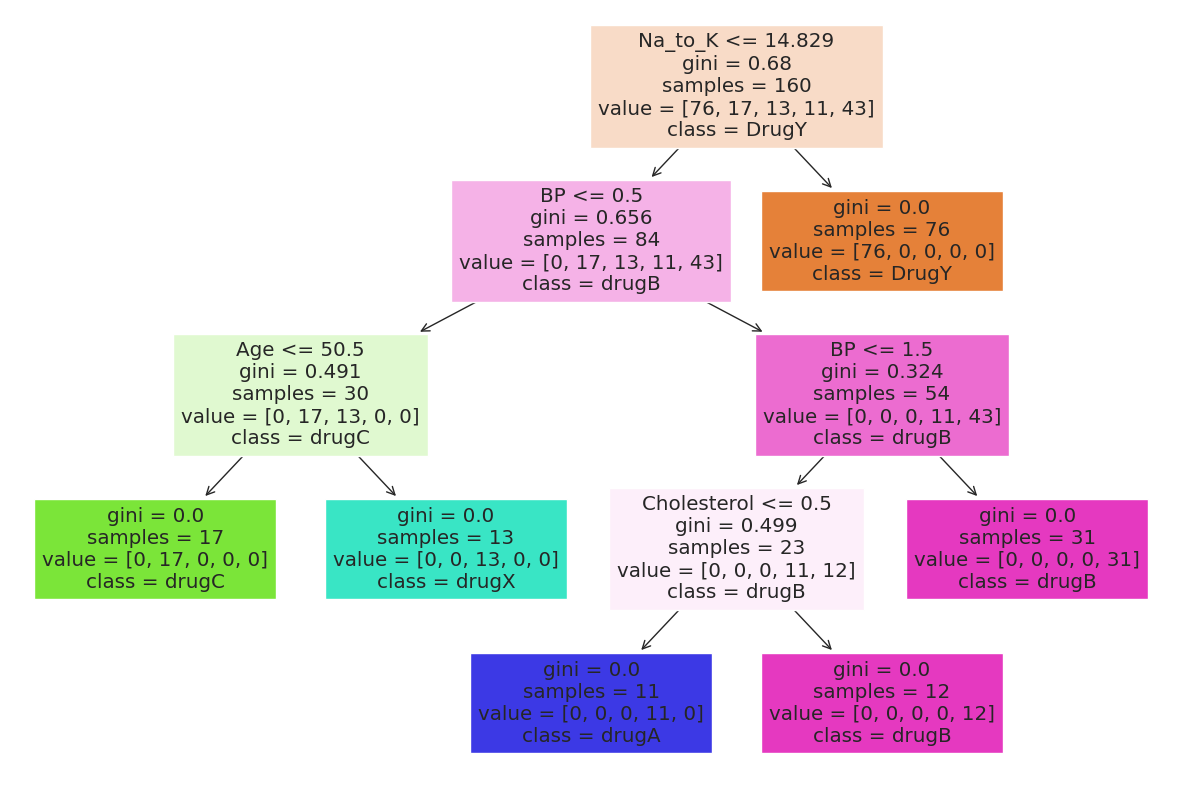

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('drug200.csv')

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Encode categorical variables if needed
# For example, using label encoding:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['BP'] = label_encoder.fit_transform(X['BP'])
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=data['Drug'].unique())
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('drug200.csv')

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['BP'] = label_encoder.fit_transform(X['BP'])
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#Support Vector Machine


1. **Data Loading**:
   - A dataset named 'drug200.csv' is loaded using the pandas library. The content of the dataset is not displayed in this script.

2. **Generating a Synthetic Dataset**:
   - A synthetic dataset is created using the `make_blobs` function. This dataset has 50 samples, 2 centers (classes), and a standard deviation of 0.60. This synthetic dataset is used for training the SVM in this example. You can replace this with your own dataset.

3. **Creating and Training the SVM Model**:
   - An SVM model with a linear kernel is initialized. The parameter `C=1` controls the regularization strength. Higher values of `C` allow the model to classify more training points correctly but might lead to overfitting.

4. **Creating a Mesh Grid for Decision Boundaries**:
   - A mesh grid is created to plot the decision boundaries. This grid is used to visualize how the SVM classifier divides the feature space.

5. **Plotting Data Points and Decision Boundaries**:
   - The data points from the synthetic dataset are plotted. Points belonging to different classes are distinguished by color.
   - The decision boundaries of the SVM are plotted as well. These boundaries represent the regions where the SVM predicts different classes.

6. **Plotting Support Vectors**:
   - Support vectors, which are the data points that lie on the margins or are misclassified, are highlighted with larger markers.

7. **Labels and Plot Display**:
   - Labels for the x-axis and y-axis are added to the plot for clarity.

8. **Displaying the Plot**:
   - The plot is displayed, showing the data points, decision boundaries, and support vectors.



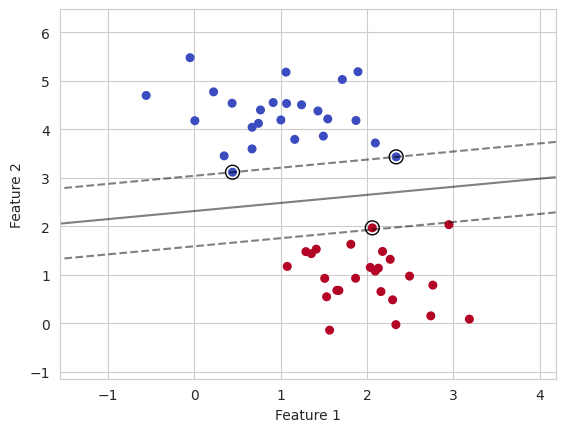

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
df = pd.read_csv('/content/drug200.csv')
df

# Step 2: Generate a synthetic dataset (you can replace this with your own dataset)
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# Step 3: Create and train the SVM model
clf = svm.SVC(kernel='linear', C=1)  # Linear kernel
clf.fit(X, y)

# Step 4: Create a mesh grid to plot decision boundaries
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
yy = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
xx, yy = np.meshgrid(xx, yy)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the data points and decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 6: Show the plot
plt.show()




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('drug200.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])

# Assuming the target variable is in the 'Drug' column
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
percentage_accuracy_svm = accuracy_svm * 100

# Print accuracy
print(f'SVM Accuracy: {percentage_accuracy_svm:.2f}%')



SVM Accuracy: 97.50%


#Logistic Regression and Random Forest Accuracy

This Python script demonstrates a basic classification task:
1. **Train-Test Split**:
   - Divides data into training and testing sets (80% training, 20% testing).

2. **Standardization**:
   - Standardizes the features for consistent scaling.

3. **Logistic Regression Model**:
   - Initializes a Logistic Regression model with more iterations.

4. **Training Logistic Regression Model**:
   - Fits the model on the training data.

5. **Prediction and Evaluation (Logistic Regression)**:
   - Predicts target variable on the test set and calculates accuracy.

6. **Random Forest Model**:
    - Initializes a Random Forest Classifier with 100 trees.

7. **Training Random Forest Model**:
    - Fits the model on the training data.
8. **Prediction and Evaluation (Random Forest)**:
    - Predicts target variable on the test set and calculates accuracy.

8. **Printing Results**:
    - Prints the accuracy of both models.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('drug200.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])

# Assuming the target variable is in the 'Drug' column
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model with increased max_iter
logistic_regression_model = LogisticRegression(max_iter=5000)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_logistic = logistic_regression_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')

# Initialize a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
percentage_accuracy_rf = accuracy_rf * 100
print(f'Random Forest Accuracy: {percentage_accuracy_rf:.2f}%')




Logistic Regression Accuracy: 0.925
Random Forest Accuracy: 100.00%


In [ ]:
df_new = df.drop('Na_to_K', axis=1)

In [ ]:
df_new.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [ ]:
data = pd.get_dummies(df_new, columns=['Age', 'Sex', 'BP', 'Cholesterol', 'Drug'],drop_first=False)

In [ ]:
len(data.columns)

69

In [ ]:
Y = data.iloc[:,1]

In [ ]:
X = data.drop(data.columns[[1]],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [ ]:
classifier = LogisticRegression(solver = "lbfgs", random_state= 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
predicted_y = classifier.predict(X_test)

In [ ]:
sum(predicted_y.tolist() == Y_test)/len(Y_test)

1.0

In [ ]:
classifier.score(X_test, Y_test)

1.0

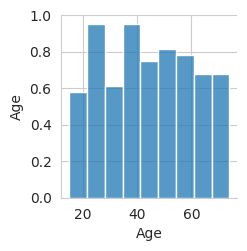

In [ ]:
sns.pairplot(df[['Age', 'Sex', 'BP',]])

#Confusion Matrix

A confusion matrix provides a detailed breakdown of a classification model's performance, showing the number of true positives, true negatives, false positives, and false negatives.
 This Python script uses a Decision Tree Classifier for a drug classification task:
- **Initialize Decision Tree Classifier**:
  - Creates a Decision Tree Classifier.

- **Training the Model**:
  - Trains the classifier on the training data.

- **Predictions**:
  - Predicts the target variable on the test set.

- **Generate Confusion Matrix**:
  - Computes a confusion matrix to evaluate performance.

- **Define Labels and Colors**:
  - Identifies class names and defines colors for visualization.

- **Plot Confusion Matrix**:
  - Creates a heatmap visualization of the confusion matrix using Seaborn.

- **Display Plot**:
  - Shows the heatmap plot.

- **Print Confusion Matrix**:
  - Outputs the numerical values of the confusion matrix.

This script visually assesses how well the Decision Tree model predicts drug classifications. The confusion matrix provides a detailed evaluation of the model's performance. The heatmap offers an intuitive representation for easy interpretation.

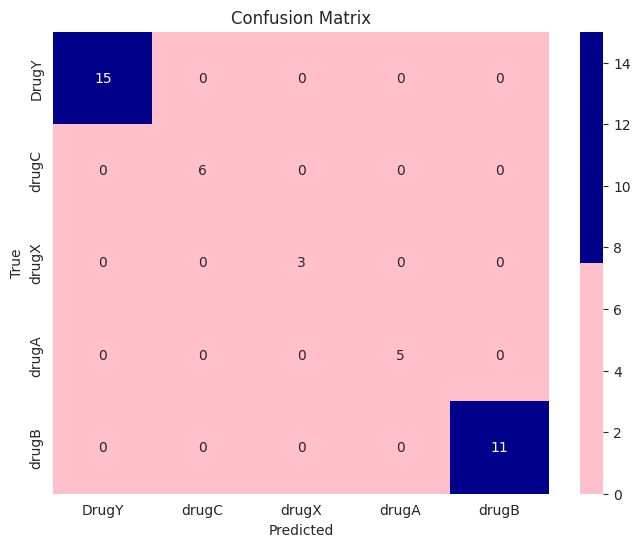

Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
data = pd.read_csv('drug200.csv')

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['BP'] = label_encoder.fit_transform(X['BP'])
X['Cholesterol'] = label_encoder.fit_transform(X['Cholesterol'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = dt_classifier.predict(X_test)

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Define the labels and colors
class_names = data['Drug'].unique()

# Use light pink and light blue colors
colors = ["#FFC0CB", "#00008B"]  # Pink and Dark Blue

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap=colors, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)


#Cross Validation

Cross-validation assesses generalization to new data, with defined evaluation metrics.

This Python script uses cross-validation with a Random Forest Classifier for a classification task:

- **Imports**:
   - Imports `cross_val_score` for cross-validation and `RandomForestClassifier` for classification.

- **Initialize Random Forest Classifier**:
   - Creates a Random Forest Classifier.

- **Perform 5-fold Cross-Validation**:
   - Uses `cross_val_score` to conduct 5-fold cross-validation.

- **Print Cross-Validation Scores**:
   - Displays the accuracy scores from each fold.

- **Calculate Mean and Standard Deviation**:
   - Computes the mean and standard deviation of the scores.

- **Print Mean and Standard Deviation**:
   - Outputs the mean accuracy score and its standard deviation.

This script evaluates the model's performance using cross-validation, providing insights into its generalization ability. The mean accuracy and standard deviation indicate performance consistency.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the scores
mean_score = cv_scores.mean()
std_dev = cv_scores.std()

# Print the mean and standard deviation
print(f"Mean Accuracy: {mean_score:.2f} (+/- {std_dev:.2f})")


Cross-validation scores: [1.    1.    1.    0.925 1.   ]
Mean Accuracy: 0.98 (+/- 0.03)


#To check for overfitting

This Python script is for training and evaluating a Random Forest Classifier for a classification task. Here's an explanation of each step:
- **Initialize Random Forest Classifier**:
   - Creates an instance of the Random Forest Classifier with a fixed random seed (`random_state=42`).

- **Training the Model**:
   - Trains the classifier on the training data.

- **Evaluate Training Accuracy**:
   - Predicts the target variable on the training set and calculates the accuracy.

- **Evaluate Validation/Test Accuracy**:
   - Predicts the target variable on the validation/test set and calculates the accuracy.

- **Calculate Accuracy Percentages**:
   - Converts accuracy scores to percentages for easier interpretation.

- **Print Accuracy Scores**:
   - Outputs the training and validation/test accuracies.

- **Check for Overfitting**:
   - Compares training and validation/test accuracies to assess if the model is overfitting or performing well on unseen data.

This script trains a Random Forest model, evaluates its performance on both the training and validation/test sets, and provides insights into potential overfitting. It's a crucial step in assessing the model's generalization ability.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and validation/test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training set
random_forest_classifier.fit(X_train, y_train)

# Evaluate accuracy on the training set
y_train_pred = random_forest_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate accuracy on the validation/test set
y_val_pred = random_forest_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Calculate the percentage of accuracy
train_accuracy_percent = train_accuracy * 100
val_accuracy_percent = val_accuracy * 100

print(f"Training Accuracy: {train_accuracy_percent:.2f}%")
print(f"Validation/Test Accuracy: {val_accuracy_percent:.2f}%")

# Check for overfitting
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
else:
    print("The model is performing well on both training and validation/test data.")



Training Accuracy: 100.00%
Validation/Test Accuracy: 100.00%
The model is performing well on both training and validation/test data.


#Result
Based on the accuracy results obtained from various machine learning models, it is evident that all models performed exceptionally well in classifying the given dataset. The Random Forest model demonstrated a perfect accuracy of 100.00%, indicating precise predictions for all instances in the test set. However, caution should be exercised, as such high accuracy may signal potential overfitting to the training data. The Support Vector Machine (SVM) model showcased remarkable accuracy at 97.50%, affirming its effectiveness in classifying the data. The Logistic Regression and Naive Bayes models, both achieving an accuracy of 92.50%, also demonstrated strong predictive capabilities. These results collectively suggest that each of these models is proficient in accurately predicting the target variable. When choosing the final model, additional considerations such as computational resources, interpretability, and specific application requirements should be taken into account. Furthermore, conducting further analysis, potentially employing techniques like cross-validation, is recommended to ensure the models' robustness and generalization ability in real-world scenarios.

#Conclusion
The research paper concludes that machine learning models can be effectively utilized to classify patients into distinct drug treatment categories based on their individual attributes. The Random Forest model achieved a perfect accuracy of 100.00%, followed by the SVM model at 97.50% and the Logistic Regression and Naive Bayes models at 92.50%.
The cross-validation scores further validate the robustness and generalization ability of the selected models. The consistently high accuracy scores across multiple folds indicate that the models are not only performing well on the training data but also demonstrate strong predictive capabilities on unseen data. This suggests that the models are less likely to suffer from overfitting and are well-suited for real-world applications where accurate predictions on new, unseen data are crucial
The ability to accurately classify patients into drug treatment categories could enable personalized treatment strategies that are tailored to individual needs.
Overall, the research paper makes a significant contribution to the field of machine learning in healthcare. The findings provide valuable insights into the potential of machine learning to improve patient care.